In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df['Ram']=df['Ram'].str.replace("GB","")
df['Weight']=df.Weight.str.replace("kg","")

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
df['Ram']=df.Ram.astype('int32')
df['Weight']=df.Weight.astype('float32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

<Axes: xlabel='Price', ylabel='Count'>

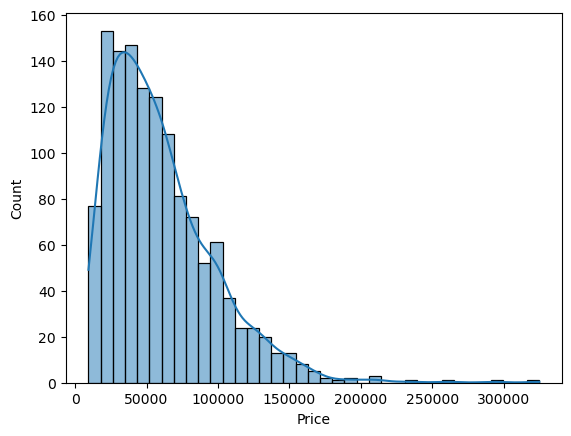

In [11]:
## price distribution
sns.histplot(df.Price,kde=True) #skewed data

<Axes: xlabel='Company'>

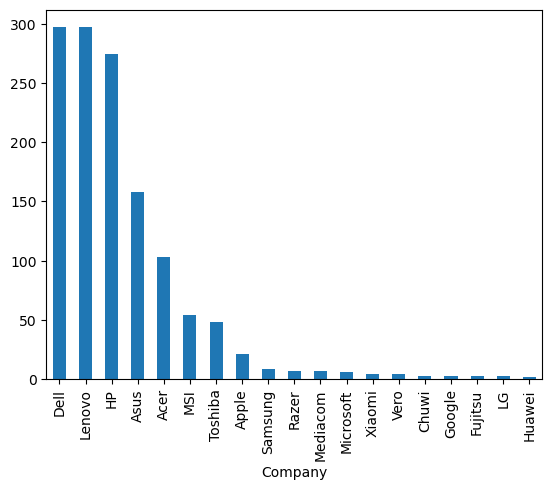

In [12]:
## number of laptops in each brand 
df.Company.value_counts().plot(kind='bar')

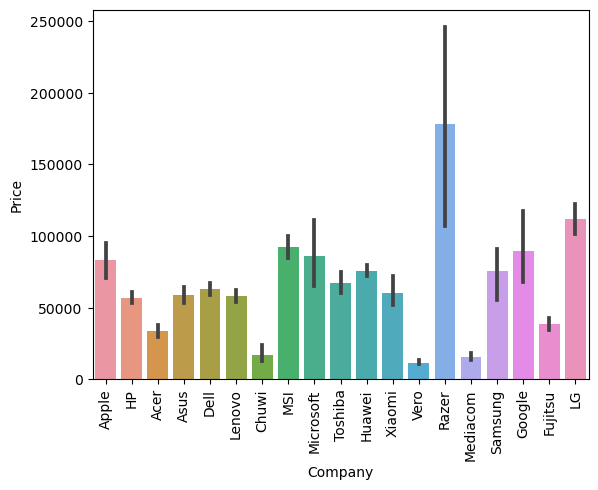

In [13]:
## relation between company and price
sns.barplot(x=df['Company'],y=df['Price']) # price depends on the type of company
plt.xticks(rotation='vertical')
plt.show() # average price of laptops

<Axes: xlabel='TypeName'>

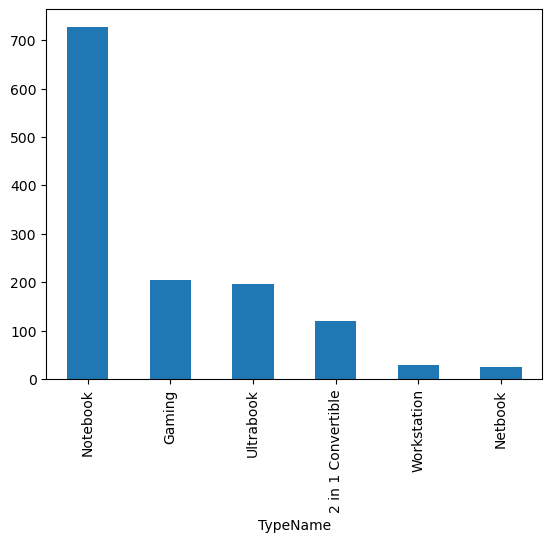

In [14]:
## number of different types of laptops
df['TypeName'].value_counts().plot(kind='bar')

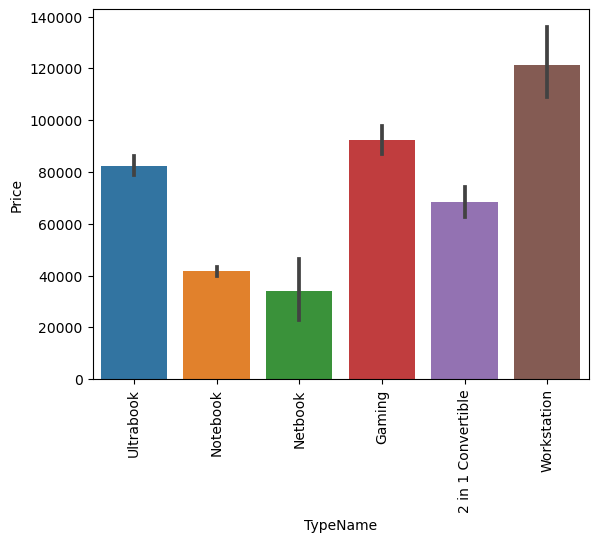

In [15]:
## relation between types and price
sns.barplot(x=df.TypeName,y=df.Price)
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

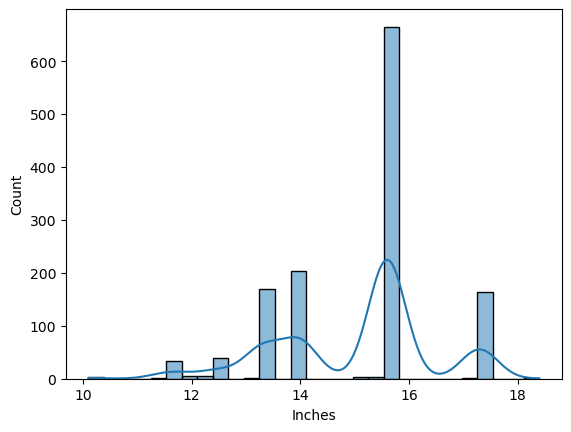

In [16]:
## different inches of laptop
sns.histplot(df.Inches,kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

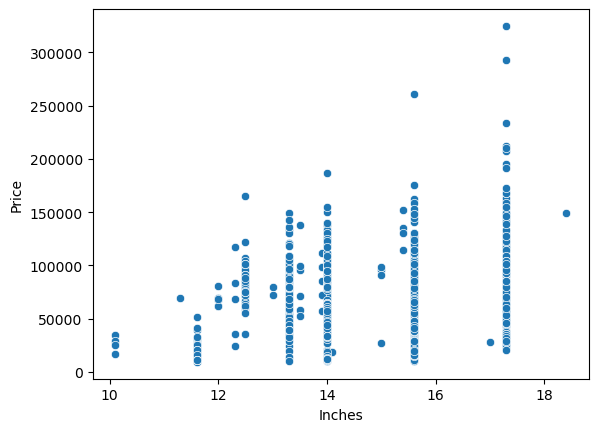

In [17]:
## relation with price and inches
sns.scatterplot(x=df.Inches,y=df.Price)
# as inches increases price also increase.. but the relation is not strong

In [18]:
df.ScreenResolution.value_counts() # we can see if the laptops are touchscreen or not we can also see ips resolution

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [19]:
df['Touchscreen']=df.ScreenResolution.apply(lambda x: 1 if ('Touchscreen' or 'touchscreen') in x else 0)

In [20]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
720,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0
379,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,45074.8800,0
1098,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,26640.0000,0
214,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,79866.7200,0
702,Lenovo,Notebook,15.6,1366x768,AMD A12-Series 9720P 3.6GHz,8,1TB HDD,AMD Radeon R7,Windows 10,2.20,22857.1200,0


In [21]:
df.Touchscreen.value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

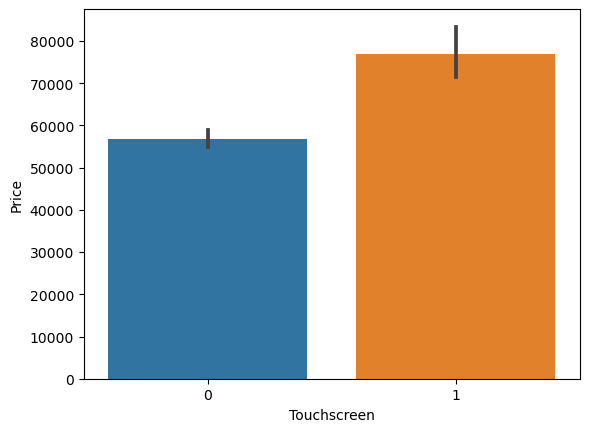

In [22]:
sns.barplot(x=df.Touchscreen,y=df.Price)

In [23]:
df['IPS']=df.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

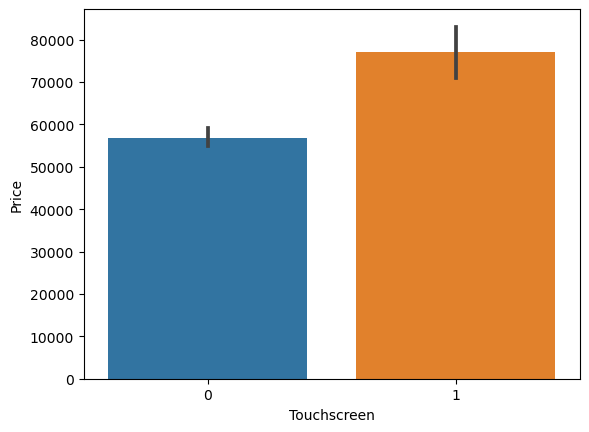

In [24]:
sns.barplot(x=df.Touchscreen,y=df.Price)

In [25]:
temp_df=df.ScreenResolution.str.split('x',n=1,expand=True)
temp_df.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [26]:
df['X_res']=temp_df[0]
df['Y_res']=temp_df[1]

In [27]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

'''
\d? digit is optional
\d+ would match "123", "4567", "789", etc. (1 or more digits)
\d alone would match only a single digit.
\d* would match zero or more digits, including an empty string.
'''

'''
\d+\.?\d+ --> 1 or more digit followed by optional dot(.) and followed by 1 or more digits
'''

'\n\\d+\\.?\\d+ --> 1 or more digit followed by optional dot(.) and followed by 1 or more digits\n'

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [29]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [30]:
df[[col for col in df.columns if df[col].dtype!='object']].corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [31]:
# strong correlation with ram, X_res, Y_res 
# no much correlation with inches

In [32]:
# ppi pickels per inches
df['ppi']=((df.X_res**2 + df.Y_res**2)**0.5/df.Inches).astype('float')

In [33]:
df[[col for col in df.columns if df[col].dtype!='object']].corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [34]:
df.drop(columns=['X_res','Y_res','ScreenResolution','Inches'],inplace=True,axis=1)

In [35]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [36]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [37]:
df['CpuName']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

'''
.apply(lambda x: " ".join(x.split()[0:3])): This applies a function to each element of the 'Cpu' column. 

Let's break down the lambda function:

lambda x:: This defines an anonymous function that takes one argument, denoted here as x.

" ".join(x.split()[0:3]): This function call splits the input string x into a list of words using whitespace as the separator (x.split()),
then selects the first three words ([0:3]), and finally joins them back into a single string with whitespace between them (" ".join(...)).

'''

'''
.apply(lambda x:x.split()[0:3]) --> will give list of 1st 3 values splitted by " "
'''

'\n.apply(lambda x:x.split()[0:3]) --> will give list of 1st 3 values splitted by " "\n'

In [38]:
def fetch_processor(text):
    if text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return "AMD Processor"

In [39]:
df['CpuBrand']=df.CpuName.apply(fetch_processor)

In [40]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuName,CpuBrand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CpuBrand'>

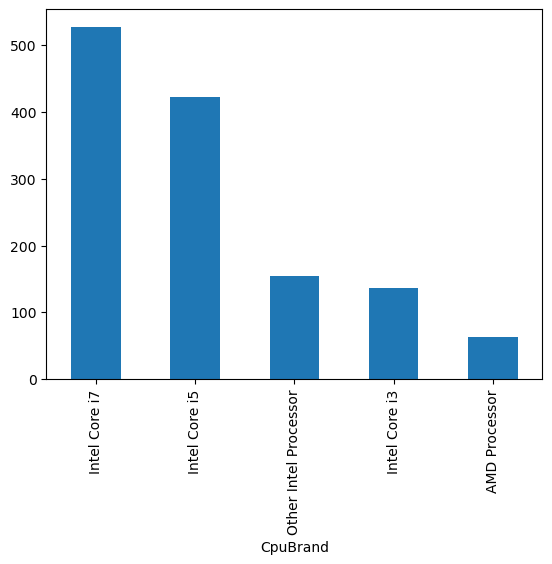

In [41]:
df.CpuBrand.value_counts().plot(kind='bar')

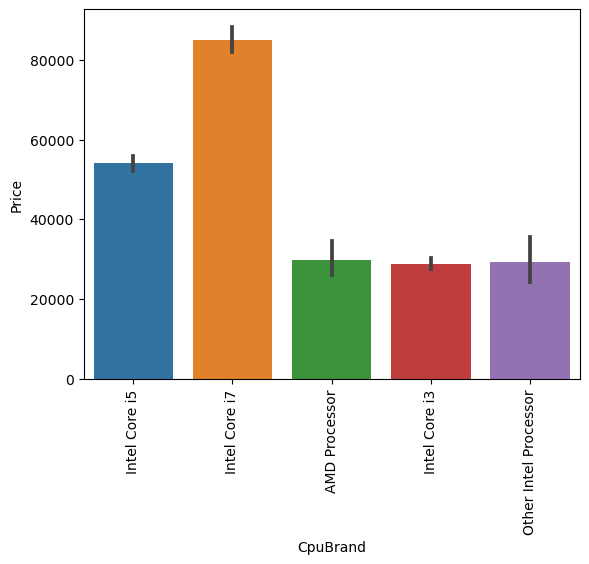

In [42]:
sns.barplot(x=df.CpuBrand,y=df.Price)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
df.drop(columns=['Cpu','CpuName'],inplace=True,axis=1)

<Axes: xlabel='Ram'>

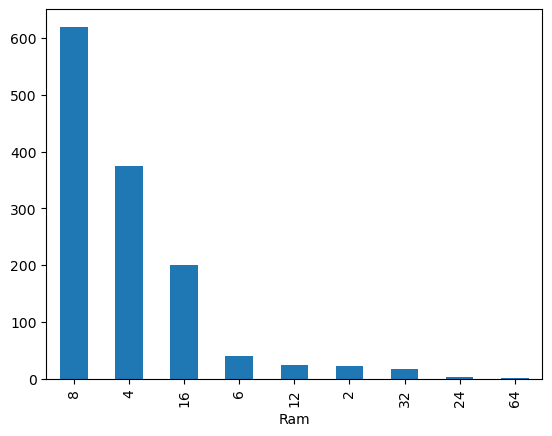

In [44]:
df.Ram.value_counts().plot(kind='bar')

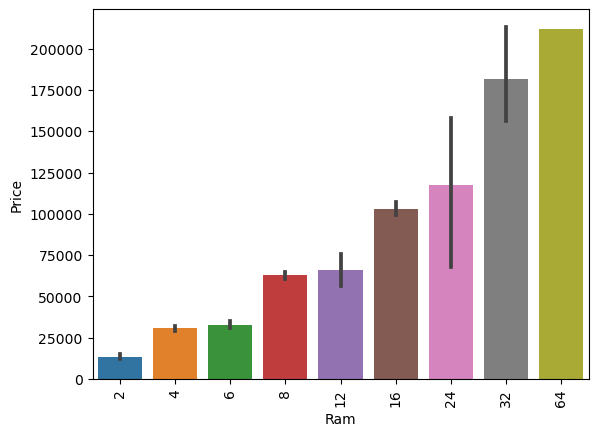

In [45]:
sns.barplot(x=df.Ram,y=df.Price)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [47]:
df.Memory=df.Memory.astype(str).replace('\.0','',regex=True) # because 1.0TB exist
df.Memory=df.Memory.str.replace('GB','')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df['first']=new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df.second.fillna("0",inplace=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second']=df.second.str.replace(r'\D','',regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

> .replace('\\.0', '', regex=True): This applies the replace() function to each element of the 'Memory' column. Let's break down the parameters:

+ '\\.0': This is the pattern to be replaced. It represents a decimal point followed by a zero. The backslash \ is used to escape the dot . because . has a special meaning in regular expressions and we want to match the literal dot character.
+ '': This is the replacement value. It is an empty string, which means that any occurrence of the pattern will be replaced with nothing, effectively removing it.
+ regex=True: This parameter indicates that the pattern should be treated as a regular expression. Since we are using \ and ., which are special characters in regular expressions, we need to set regex=True to interpret the pattern correctly.


>.str.replace(r'\D', ''): This applies the replace() function to each element of the 'second' column. The parameters are:

+ r'\D': This is a regular expression pattern that matches any non-digit character. The \D matches any character that is not a digit (0-9). The r prefix denotes a raw string, which is often used with regular expressions to prevent backslashes from being interpreted as escape characters.
+ '': This is the replacement value. Since it's an empty string, any non-digit character matched by the pattern will be replaced with nothing, effectively removing it.

In [48]:
df.drop(columns=['Memory'],inplace=True)

In [49]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
308,Lenovo,Notebook,8,Nvidia GeForce 940MX,Windows 10,2.30,43636.320,0,0,141.211998,Intel Core i5,1000,128,0,0
22,HP,Notebook,4,AMD Radeon R2,No OS,1.86,13746.240,0,0,100.454670,AMD Processor,500,0,0,0
1230,Lenovo,Netbook,16,Intel HD Graphics 520,Windows 10,1.30,87912.000,1,1,176.232574,Intel Core i7,0,512,0,0
188,Acer,Ultrabook,8,Intel HD Graphics 615,Windows 10,1.12,52693.920,0,1,165.632118,Intel Core i5,0,256,0,0
1147,Dell,Notebook,8,Nvidia GeForce 940MX,Windows 10,2.18,53807.472,0,0,141.211998,Intel Core i7,0,256,0,0


In [50]:
df[[col for col in df.columns if df[col].dtype!='object']].corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float32
 6   Price          1303 non-null   float64
 7   Touchscreen    1303 non-null   int64  
 8   IPS            1303 non-null   int64  
 9   ppi            1303 non-null   float64
 10  CpuBrand       1303 non-null   object 
 11  HDD            1303 non-null   int64  
 12  SSD            1303 non-null   int64  
 13  Hybrid         1303 non-null   int64  
 14  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 142.6+ KB


In [52]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
# there correlation is too low

In [53]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [54]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [55]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [56]:
df = df[df['Gpu brand'] != 'ARM']

In [57]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

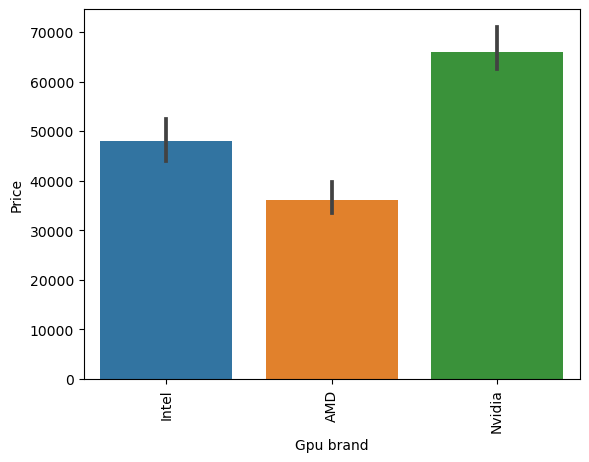

In [58]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
df.drop(columns=['Gpu'],inplace=True,axis=1)

In [60]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [61]:
df['OpSys'].value_counts()


OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

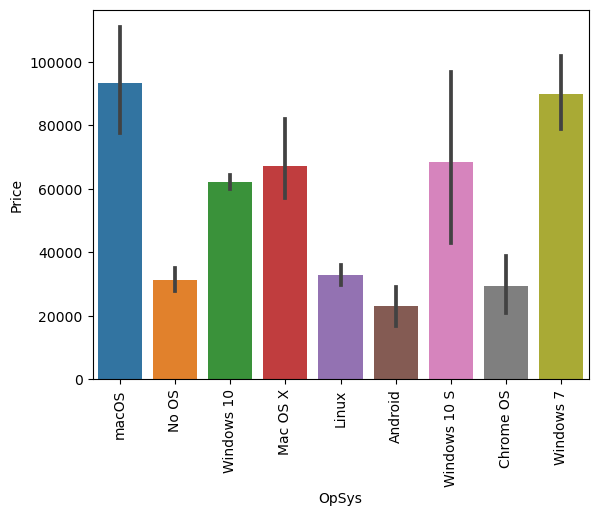

In [62]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [64]:
df['os'] = df['OpSys'].apply(cat_os)

In [65]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [66]:
df.drop(columns=['OpSys'],inplace=True,axis=1)

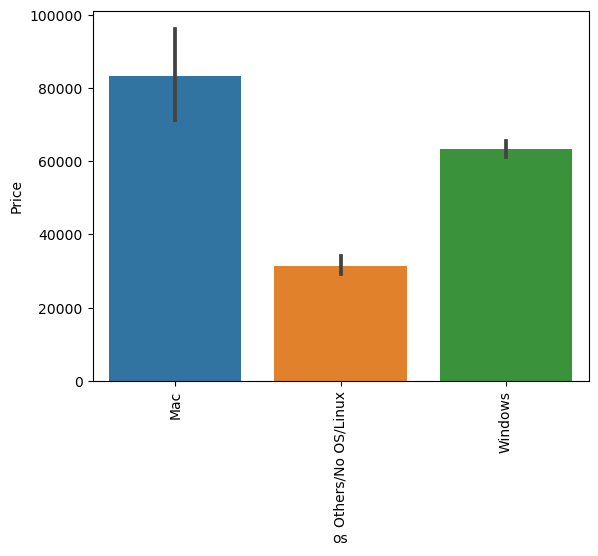

In [67]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

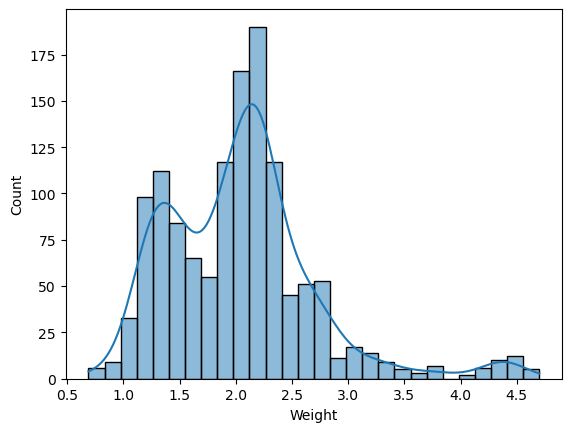

In [68]:
sns.histplot(df['Weight'],kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

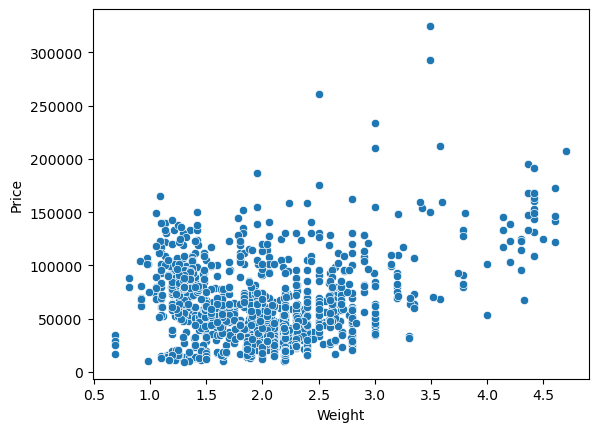

In [69]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [70]:
corr=df[[col for col in df.columns if df[col].dtype!='object']].corr()
df[[col for col in df.columns if df[col].dtype!='object']].corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

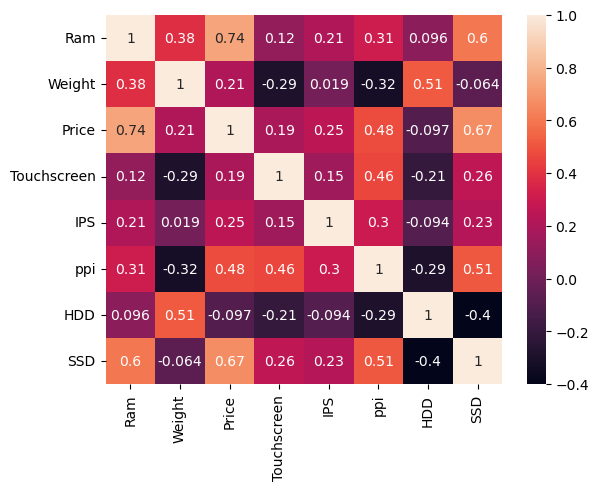

In [71]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='Price', ylabel='Count'>

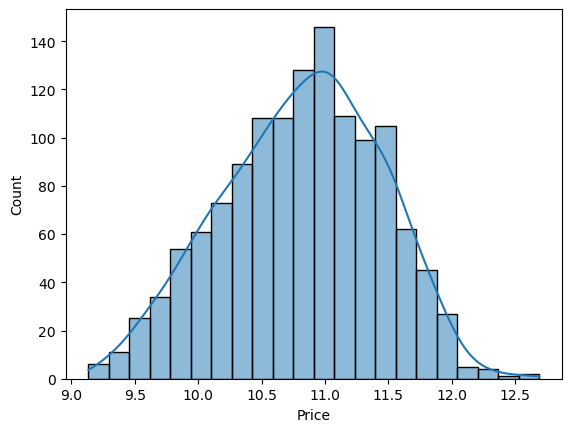

In [72]:
sns.histplot(np.log(df['Price']),kde=True)

In [73]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [74]:
X = df.drop(columns=['Price'])
y = np.log(df['Price']) # to easier the calculation

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [76]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor

## linear regression

In [78]:
step1 =ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred_lr=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_lr))
print('MAE',mean_absolute_error(y_test,y_pred_lr))

R2 score 0.8073277448418621
MAE 0.21017827976428963


## Ridge Regression

In [79]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=Ridge(alpha=15)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_ridge))
print('MAE',mean_absolute_error(y_test,y_pred_ridge))

R2 score 0.8129022475925655
MAE 0.2095562936370785


## Lasso regression

In [80]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred_lasso=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_lasso))
print('MAE',mean_absolute_error(y_test,y_pred_lasso))

R2 score 0.8071853945317105
MAE 0.21114361613472565


## KNN

In [81]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=5)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred_knn=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_knn))
print('MAE',mean_absolute_error(y_test,y_pred_knn))

R2 score 0.8023665883791459
MAE 0.19995757033698672


## decision tree

In [82]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred_dt=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_dt))
print('MAE',mean_absolute_error(y_test,y_pred_dt))

R2 score 0.8451037337207679
MAE 0.18076117762494376


## rf

In [83]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred_rf=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_rf))
print('MAE',mean_absolute_error(y_test,y_pred_rf))

R2 score 0.8873402378382488
MAE 0.15860130110457718


## svm

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.808318090228966
MAE 0.20239059427193437


## Extra Trees

In [87]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreeRegressor(   random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8214841115869005
MAE 0.1954643416739916


## AdaBoost

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7931188303276279
MAE 0.22976972376642485


## Gradient Boost

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8810269229182555
MAE 0.15983275946452874


## XgBoost

In [97]:
from xgboost import XGBRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=4,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8836114292564307
MAE 0.15348089737639073


## Voting Regressor

In [101]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreeRegressor(random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8910643350704532
MAE 0.15746810080256943


## Stacking

In [103]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.878989823270347
MAE 0.16642819150483903


## gridsearchcv on rf

In [112]:
from sklearn.model_selection import GridSearchCV

# for random forest

# params={'n_estimators':[100,150],
# #     'criterion':['squared_error','absolute_error'],
#     'max_depth':[10,15,None],
#     'max_samples':[.5,.75,.8],
#     'max_features':[1,0.75]    
# }

# Define parameter grid including criterion
params = {
    'step2__n_estimators': [100, 150],
    'step2__max_depth': [10, 15, None],
    'step2__max_samples': [0.5, 0.75, 0.8],
    'step2__max_features': [1, 0.75]
}

step1=ColumnTransformer(transformers=[('trf',OneHotEncoder(sparse_output=False),[0,1,7,10,11])],remainder='passthrough')
step2=RandomForestRegressor()

pipe=Pipeline([('step1',step1),('step2',step2)])


rf_grid=GridSearchCV(estimator=pipe,param_grid=params,cv=5,verbose=True,n_jobs=-1)

+ Parameters such as max_depth, max_samples, and max_features are specified with the prefix step2__ to indicate that they belong to the RandomForestRegressor step within the pipeline.
+ step2__ is followed by the parameter name, for example, step2__max_depth, step2__max_samples, etc.
+ This structure ensures that these parameters are applied correctly to the RandomForestRegressor step during the grid search process.

In [113]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('trf',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         [0, 1,
                                                                          7, 10,
                                                                          11])])),
                                       ('step2', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'step2__max_depth': [10, 15, None],
                         'step2__max_features': [1, 0.75],
                         'step2__max_samples': [0.5, 0.75, 0.8],
                         'step2__n_estimators': [100, 150]},
             verbose=True)

In [114]:
rf_grid.best_params_

{'step2__max_depth': None,
 'step2__max_features': 0.75,
 'step2__max_samples': 0.8,
 'step2__n_estimators': 100}

In [115]:
params = {
 'step2__max_depth': None,
 'step2__max_features': 0.75,
 'step2__max_samples': 0.8,
 'step2__n_estimators': 100
         }

step1=ColumnTransformer(transformers=[('trf',OneHotEncoder(sparse_output=False),[0,1,7,10,11])],remainder='passthrough')
step2=RandomForestRegressor()

pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', RandomForestRegressor())])

In [116]:
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8889538897984657
MAE 0.15330260000138032


## Exporting the Model

In [117]:
import pickle

pickle.dump(df,open('df.pkl','wb')) # needed for html code
pickle.dump(pipe,open('pipe.pkl','wb'))